# init

In [1]:
import sys 
sys.path.append('pyfiles/')
import classes_loop as cl
# so we don't have to reboot kernel every time we modify classes.py
%load_ext autoreload
%autoreload 2

# math stuff
import numpy as np
# visualization
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.spatial import distance
from copy import deepcopy

import matplotlib.pyplot as plt
%matplotlib inline
# sliders
from ipywidgets import interactive

# for matrix import and display
import pandas as pd
from IPython.display import display_html 
import csv 

# to time things
import time

# for polygon grid
from matplotlib.path import Path as mplPath

######## NOTE: from this point on, order is important. 
# it would be good to make the code more robust, but right
# now, there are ordered dependencies between functions.

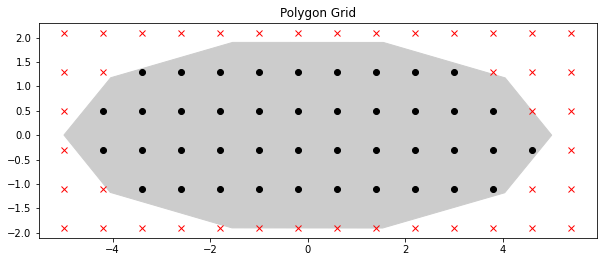

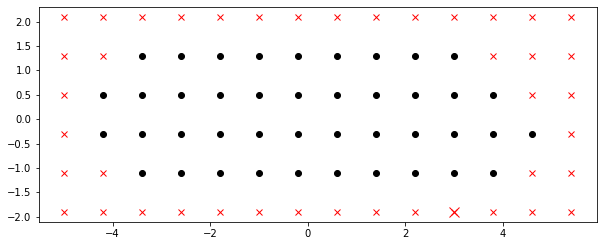

[]

In [17]:
points, inside, x_range, y_range = \
cl.polygon_grid(cl.ellipse_example(10), 0.8, plot = True);

cl.plot_nbrs(10, points, inside, x_range, y_range)
# x_range is all of the x points repeated across the grid
cl.find_neighbors(10, inside, x_range, y_range)
# r, l, up, down

In [4]:
# x_range is all of the x points repeated across the grid
cl.find_neighbors(10, inside, x_range, y_range)
# r, l, up, down

[]

In [5]:
# each row in neighbs is two special points to check knees between 
neighbs = cl.neighb_pairs(points, inside, x_range, y_range)

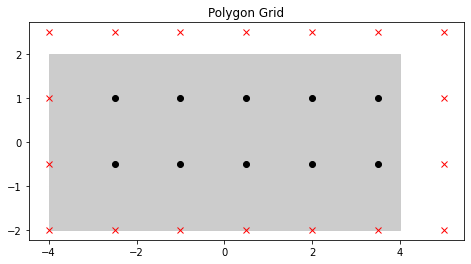

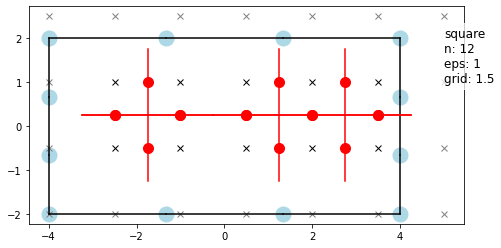

In [466]:
############################
# CONTROL PARAMETERS # 
############################
n = 12
e = 1
# 0.8 is usual
# 0.5, 0.3 
g = 1.5
# these shift the grid over
x_shift = 0
y_shift = 0
pts = cl.rectangle_example(n, display = False)
name = 'square'
filename = '20_1_g08'
gridon = True
makevor = False
#############################
cl.make_medial_axis(numpts = n, epsilon = e, grid_density = g, 
                inputpts = pts, design = name, axis = 0, drawgrid = gridon,
                    savefig = True, figsavename = filename + '.png',
                    x_bump = x_shift, y_bump = y_shift, plotpoints = True)

if makevor:
    vor = Voronoi(pts)
    fig, ax = plt.subplots()
    # plot voronoi stuff
    ax.set_aspect('equal')
    fig2 = voronoi_plot_2d(vor, ax, show_vertices=True, 
                    line_alpha = 0, show_points = True, 
                    point_colors='orange', point_size=10);
    plt.savefig('../shapes_medax/' + filename +'v.png', dpi = 300)

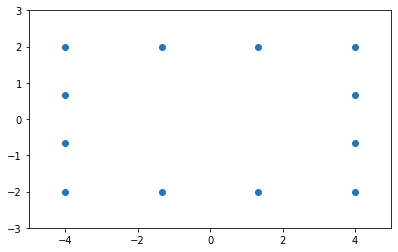

array([[-4.        ,  2.        ],
       [-1.33333333,  2.        ],
       [ 1.33333333,  2.        ],
       [ 4.        ,  2.        ],
       [ 4.        ,  0.66666667],
       [ 4.        , -0.66666667],
       [ 4.        , -2.        ],
       [ 1.33333333, -2.        ],
       [-1.33333333, -2.        ],
       [-4.        , -2.        ],
       [-4.        , -0.66666667],
       [-4.        ,  0.66666667]])

In [464]:
def rectangle_example(numpts=4, display=True):
    # note: this goes in cw order, hopefully not an issue
    # parameters for rectangle shape and sampling density
    width = 8
    height = 4
    
    # calculate points on the boundary of the rectangle
    x1 = np.linspace(-width/2, width/2, num=numpts//4+1)[:-1]
    y1 = np.full_like(x1, height/2)
    
    x2 = np.full_like(y1, width/2)
    y2 = np.linspace(height/2, -height/2, num=numpts//4+1)[:-1]
    
    x3 = np.linspace(width/2, -width/2, num=numpts//4+1)[:-1]
    y3 = np.full_like(x3, -height/2)
    
    x4 = np.full_like(y3, -width/2)
    y4 = np.linspace(-height/2, height/2, num=numpts//4+1)[:-1]
    
    x = np.concatenate([x1, x2, x3, x4])
    y = np.concatenate([y1, y2, y3, y4])
    points = np.array(list(zip(x, y)))

    if display:
        # plot rectangle
        fig, ax1 = plt.subplots(figsize=(10, 4))
        ax1.set_xlim(-width/2-1, width/2+1)
        ax1.set_ylim(-height/2-1, height/2+1)
        ax1.set_aspect("equal")
        ax1.plot(x, y, 'o', linewidth=2)
        plt.show()

    return points
rectangle_example(numpts = 12)

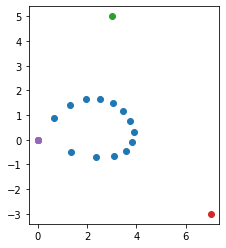

In [132]:
# bezier curves pass through first and last control points, but not nec. others

density = 15
# Define the control points
P0 = (0, 0)
P1 = (3, 5)
P2 = (7, -3)
P3 = (0,0)
points = [P0, P1, P2, P3]

# Generate the parameter values
t = np.linspace(0, 1, num = density)

# Compute the points on the curve
Bx = (1-t)**3 * P0[0] + 3*(1-t)**2 * t * P1[0] + 3*(1-t)*t**2 * P2[0] + t**3 * P3[0]
By = (1-t)**3 * P0[1] + 3*(1-t)**2 * t * P1[1] + 3*(1-t)*t**2 * P2[1] + t**3 * P3[1]

# Plot the curve
fig, ax = plt.subplots()
ax.plot(Bx, By, 'o')
for i in range(len(points)):
    ax.plot(points[i][0],points[i][1], 'o' )
ax.set_aspect('equal')
plt.show()


## EXAMPLES

### Zeroth Medial Ax

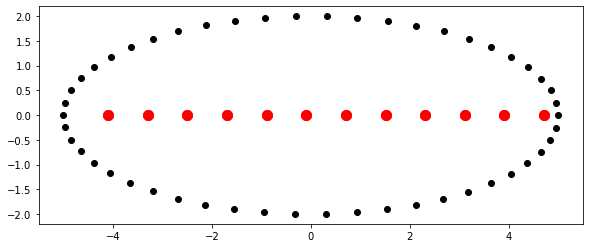

In [45]:
# epsilon is 4
# n points is 50
# cell_size = .8
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 4))
ax1.set_aspect("equal")
ax1.plot(objectt[:,0], objectt[:,1], "o", color="black")
# ax1.plot(points[inside, 0], points[inside, 1], "o", color="gray")
# ax1.plot(points[~inside, 0], points[~inside, 1], "x", color="gray")

for i in range(len(neighbs)):
    point1 = neighbs[i][0]
    point2 = neighbs[i][1]
#     print(point1, point2)
    #ax1.plot((point1[0] + point2[0])/2, (point1[1] + point2[1])/2, "o", color = "red",markersize = 10)
    if kneebetween(point1, point2, 0)[0]:
        ax1.plot((point1[0] + point2[0])/2, (point1[1] + point2[1])/2, "o", color = "red",markersize = 10)

### First Medial Ax

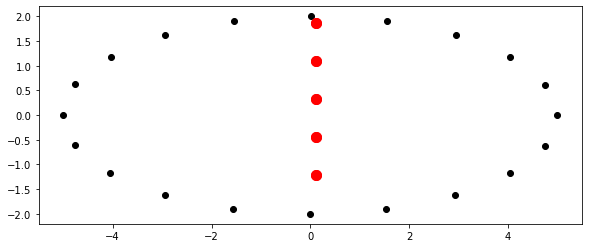

In [100]:
# eps is 3
# n points is 20
# cell_size is .77
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 4))
ax1.set_aspect("equal")
ax1.plot(objectt[:,0], objectt[:,1], "o", color="black")
# ax1.plot(points[inside, 0], points[inside, 1], "o", color="gray")
# ax1.plot(points[~inside, 0], points[~inside, 1], "x", color="gray")

for i in range(len(neighbs)):
    point1 = neighbs[i][0]
    point2 = neighbs[i][1]
#     print(point1, point2)
    #ax1.plot((point1[0] + point2[0])/2, (point1[1] + point2[1])/2, "o", color = "red",markersize = 10)
    if kneebetween(point1, point2, 1)[0]:
        ax1.plot((point1[0] + point2[0])/2, (point1[1] + point2[1])/2, "o", color = "red",markersize = 10)

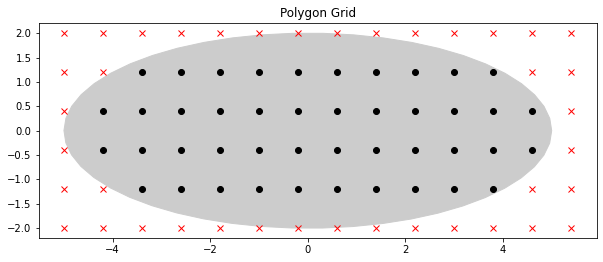

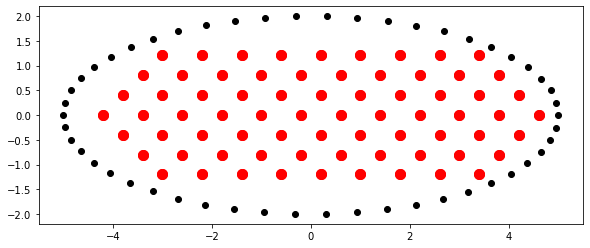

In [9]:
# 0th axis
# epsilon is 4
# n points is 50
# cell_size = .8

# init vineyard
vin = cl.vineyard()
# re init these just to make sure we can run this multiple times
vin.pointset = np.empty(2)
vin.complexlist = []
vin.matrixlist = []
vin.keypointlist = []

samplingdensity = 50
grid_density = 0.8
epsilon = 1
med_ax_dim = 0

# make grid
# input object
points, inside, x_range, y_range = \
cl.polygon_grid(cl.ellipse_example(samplingdensity), grid_density, plot = True);
# find pairs of points to check over grid
neighbs = cl.neighb_pairs(points, inside, x_range, y_range)

# init plot
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 4))
ax1.set_aspect("equal")
inputpts = cl.ellipse_example(samplingdensity)
ax1.plot(inputpts[:,0], inputpts[:,1], 'o', color = 'black')

# check if knees between
for i in range(len(neighbs)):
    point1 = neighbs[i][0]
    point2 = neighbs[i][1]
    # point1, point2, kneedim, vin, n = 20, i = 0, j = 1, 
    # eps = 1, plot = False, printout = False
    # note: i and j refer to the two positions on the stack of vineyards. 0 and 1 if we reinitialize. 
    if cl.kneebetween(point1, point2, med_ax_dim, vin, n = samplingdensity, i = 0, j = 1, eps = epsilon)[0]:
        ax1.plot((point1[0] + point2[0])/2, (point1[1] + point2[1])/2, 
                 "o", color = "red",markersize = 10)


## DEBUG LIST
- figure out if matrix[:][0] always has to be matrix[:,0] instead
- matrix.shape[1] is better than len(matrix[:][0])

from ondra: 
So arr[:][0] is kind of a pointless notation, because that is just arr[0]. You first do arr[:], which just returns the full array back to you, and then you take the first element of it -- that is, read it as (arr[:])[0]. Since number_of_cols = len(self.initmatrix[0]) is the right way to ask for number of columns (it's the length of the first row), your construction with the unnecessary [:] was also giving the correct result.

## -----------------------------------
# ask herbert

- eventually, instead of a uniform grid, should we use voronoi edges from a poisson point process to get rid of symmetry issues? 
- could issue of getting too close to edges have anything to do with using squared dist func?

## ------------------------------------
# add to manuscript
- sneaky trick in finding knees in 2D (that you compare way fewer things) 
- add figures of examples
- compare changes to epsilon, n, grid density
- comment that as n increases, so does epsilon
- try to explain why this med ax goes to edges instead of stopping at centers of curvature
- Stability: do a few experiments where ellipse gets bumps, and compare to vor med ax

## check 0 death / 1 birth switch

- if the simplex s in vin.matrixlist[0] that killed the empty set is much different than the one that killed the empty set in vin.matrixlist[1], then there is a dim 0 Type 3 Knee 
- this is easier to check than the next dimension of knee, because there's guaranteed to always be a simplex that kills the empty set if the complex isn't empty

# next: 
- pretty pictures. would be nice to visualize birth/death
- animations?! showing growth of complext for one point, and also for moving point around
- maths stuff: be able to tell if it's a type 3 knee
- make things faster: sparse matrix
- don't store things in duplicates
- later: refinement

# ToDo: 
- would be cool: replot the graph, but labeling mothers and murderers
- also cool: make graph into an animation that shows whole process
- separate voroni MA from example and add it as a graph option
- n4 -> n3 change to reduction 
- instead of separately finding zero cols and lowest ones, save them as we smart reduce
-----

- to sell the work better: start writing down all the problems we encountered to justify why we do things this way (try to remember why phat didn't work etc) 

# Triangles will cause issues: 
- currently, knee-finding relies on only having verts and edges

- in sublime, alt shift arrows to have cursors appear all the places
- ctrl shift arrows switchy switch
- ctrl shift p to find the things